# Experiments Results

In [1]:
from src.utils import plot_score_vs_nshots
import re

%load_ext autoreload
%autoreload 2

## GPT2-XL (1.5B) on TREC, SST-2, AGNews and DBPedia

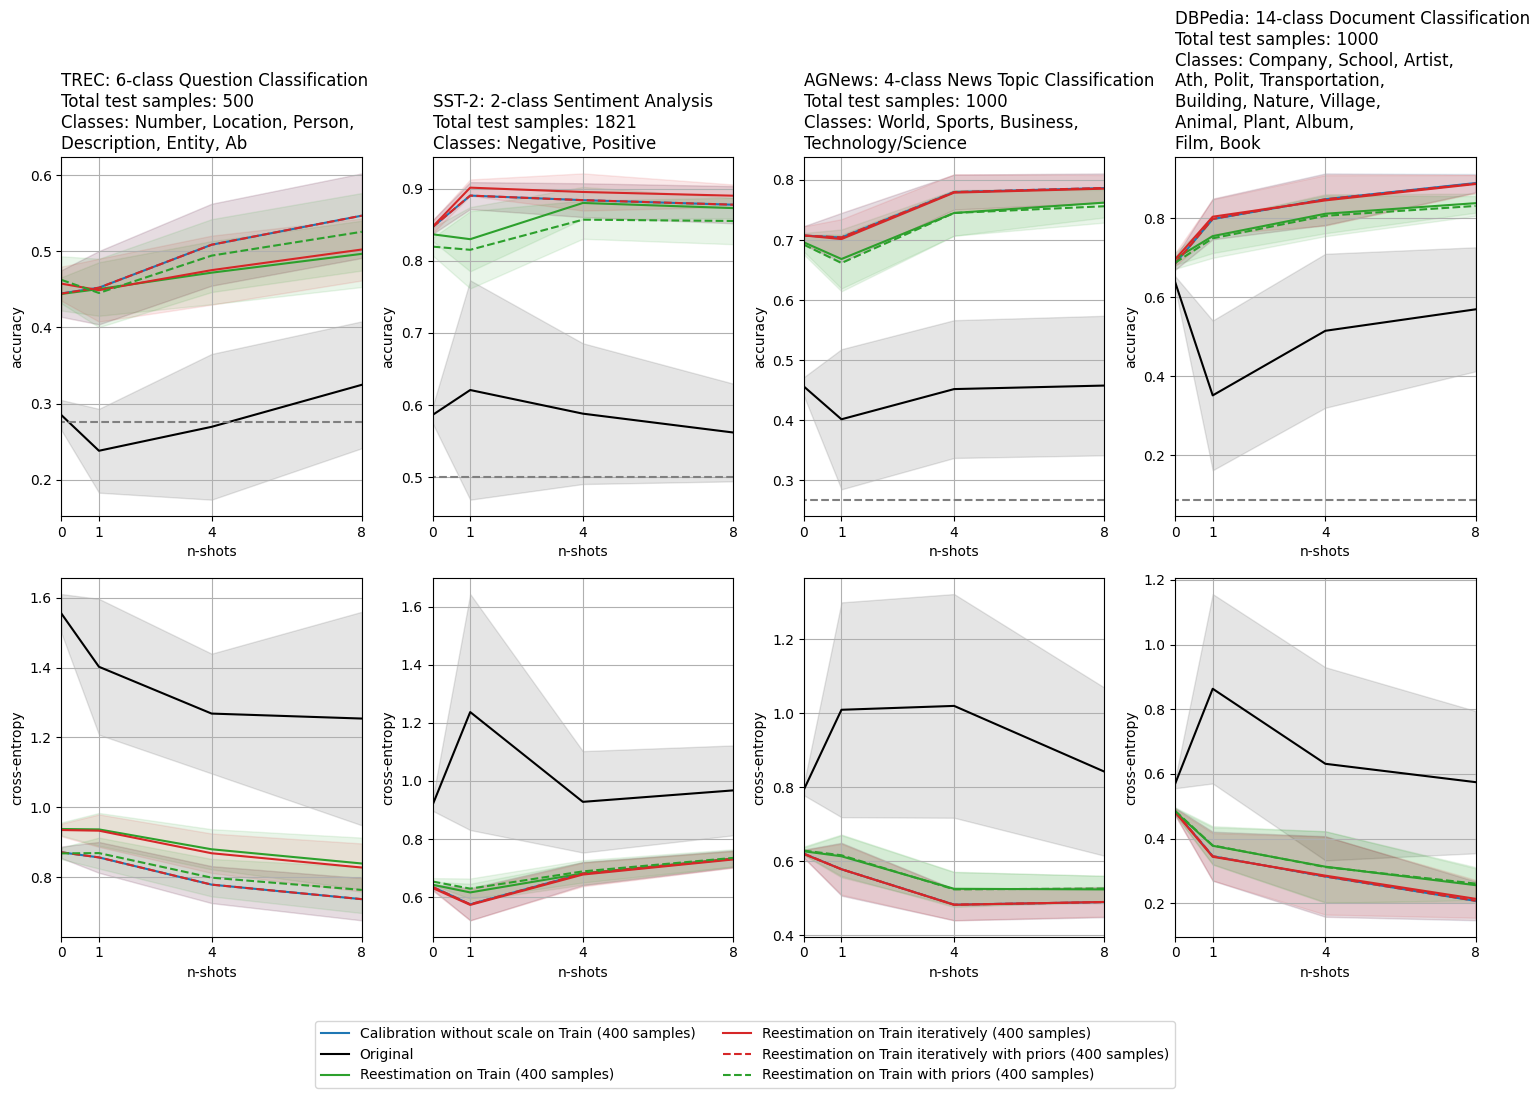

In [4]:
root_dir = "./"
experiment = "gpt2-xl_trec_sst2_agnews_dbpedia"
calibration = ["logloss_scale_100boots", "logloss_noscale_100boots"]

# !python run_model.py --root_dir $root_dir --config $experiment --use_saved_results
# for calibration_config in calibration:
#     !python run_calibration.py --root_dir $root_dir --experiment $experiment --config $calibration_config --use_saved_results

prob_types = None
metrics = ["accuracy", "cross-entropy"]
datasets = ["trec", "sst2", "agnews", "dbpedia"]
show_results = [
    "test_probs_original_logloss_scale_100boots",

    # "test_probs_reest_train_40_logloss_scale_100boots",
    # "test_probs_reest_train_100_logloss_scale_100boots",
    "test_probs_reest_train_400_logloss_scale_100boots",

    # "test_probs_reestwithpriors_train_40_logloss_scale_100boots",
    # "test_probs_reestwithpriors_train_100_logloss_scale_100boots",
    "test_probs_reestwithpriors_train_400_logloss_scale_100boots",

    # "test_probs_reestiterative_train_40_logloss_noscale_100boots",
    # "test_probs_reestiterative_train_100_logloss_noscale_100boots",
    "test_probs_reestiterative_train_400_logloss_noscale_100boots",

    # "test_probs_reestiterativewithpriors_train_40_logloss_noscale_100boots",
    # "test_probs_reestiterativewithpriors_train_100_logloss_noscale_100boots",
    "test_probs_reestiterativewithpriors_train_400_logloss_noscale_100boots",

    # "test_probs_cal_train_40_logloss_scale_100boots",
    # "test_probs_cal_train_100_logloss_scale_100boots",
    # "test_probs_cal_train_400_logloss_scale_100boots",

    # "test_probs_cal_train_40_logloss_noscale_100boots",
    # "test_probs_cal_train_100_logloss_noscale_100boots",
    "test_probs_cal_train_400_logloss_noscale_100boots",
    
    # "test_probs_reest_cf_idk_logloss_scale_100boots",
    # "test_probs_reest_cf_mask_na_none_logloss_scale_100boots"
]

def result2kwargs(name):
    cf2style = {"idk": "dotted", "mask_na_none": "dashed"}
    if "probs_original" in name:
        return dict(label="Original",color="k",linestyle="-")
    # elif "cal_peaky" in name:
    #     return dict(label="Calibration on Test", color="C0", linestyle="-")
    # elif "cal_xval" in name:
    #     return dict(label="Calibration with Cross-validation", color="C1", linestyle="-")
    elif "train_" in name:
        n = int(re.search("train_(\d+)", name).group(1))
        if "cal_" in name:
            if "noscale" in name:
                return dict(label=f"Calibration without scale on Train ({n} samples)", color="C0", linestyle="solid")
            else:
                return dict(label=f"Calibration with scale on Train ({n} samples)", color="C1", linestyle="solid")
        elif "reest_" in name:
            return dict(label=f"Reestimation on Train ({n} samples)", color="C2", linestyle="solid")
        elif "reestwithpriors_" in name:
            return dict(label=f"Reestimation on Train with priors ({n} samples)", color="C2", linestyle="dashed")
        elif "reestiterative_" in name:
            return dict(label=f"Reestimation on Train iteratively ({n} samples)", color="C3", linestyle="solid", alpha=1)
        elif "reestiterativewithpriors_" in name:
            return dict(label=f"Reestimation on Train iteratively with priors ({n} samples)", color="C3", linestyle="dashed", alpha=1)
    elif "cf_" in name:
        cf = re.search("cf_(\w+)_logloss", name).group(1)
        return dict(label=f"Reestimation with Content-Free input ({cf})", color="C4", linestyle=cf2style[cf])
    else:
        raise ValueError(f"Unknown prob_type: {name}")

plot_score_vs_nshots(root_dir, experiment, calibration, plot="line", metrics=metrics, prob_types=None, datasets=datasets, results=show_results, result2kwargs=result2kwargs)

In [7]:
from src.utils import show_table_mean_std

root_dir = "./"
experiment = "gpt2-xl-finetuned_trec"
calibration = "empty"

# !python run_model.py --root_dir $root_dir --config $experiment --use_saved_results
# for calibration_config in calibration:
#     !python run_calibration.py --root_dir $root_dir --experiment $experiment --config $calibration_config --use_saved_results

prob_types = [
    "test_probs_original"
]
datasets = ["trec"]

show_table_mean_std(root_dir, experiment, calibration, prob_types=prob_types, dataset=datasets)

In [4]:
import pandas as pd
df = pd.read_csv(f"./results/gpt2-xl_trec_sst2_agnews_dbpedia_logloss_100boots.csv")
df.groupby(["model", "dataset", "n_shots", "prob_type"]).agg({
    f"score:{metric}": ["mean", "std"] for metric in ["accuracy", "cross-entropy"]
})

score:accuracy  \
                                                                                mean   
model   dataset n_shots prob_type                                                      
gpt2-xl trec    0       test_probs_cal_peaky                                0.468574   
                        test_probs_cal_xval                                 0.458720   
                        test_probs_noscalecal_train_100                     0.423122   
                        test_probs_noscalecal_train_200                     0.437608   
                        test_probs_noscalecal_train_400                     0.447176   
                        test_probs_noscalecal_train_50                      0.393596   
                        test_probs_noscalecal_train_600                     0.453664   
                        test_probs_original                                 0.285042   
                        test_probs_reest_cf_idk                             0.369038   
                        test_probs_reest_cf_mask_na_none                    0.414134   
                        test_probs_reest_train_100                          0.426448   
                        test_probs_reest_train_200                          0.429332   
                        test_probs_reest_train_400                          0.431390   
                        test_probs_reest_train_50                           0.430938   
                        test_probs_reest_train_600                          0.432270   
                        test_probs_reestiterative_train_100                 0.419050   
                        test_probs_reestiterative_train_200                 0.422008   
                        test_probs_reestiterative_train_400                 0.427038   
                        test_probs_reestiterative_train_50                  0.419376   
                        test_probs_reestiterative_train_600                 0.426838   
                        test_probs_reestiterativewithpriors_train_100       0.423122   
                        test_probs_reestiterativewithpriors_train_200       0.437608   
                        test_probs_reestiterativewithpriors_train_400       0.447176   
                        test_probs_reestiterativewithpriors_train_50        0.393596   
                        test_probs_reestiterativewithpriors_train_600       0.453664   
                        test_probs_reestprompt_train_100                    0.427598   
                        test_probs_reestprompt_train_200                    0.429112   
                        test_probs_reestprompt_train_400                    0.430164   
                        test_probs_reestprompt_train_50                     0.427866   
                        test_probs_reestprompt_train_600                    0.428432   
                        test_probs_reestpromptwithpriors_train_100          0.430684   
                        test_probs_reestpromptwithpriors_train_200          0.448458   
                        test_probs_reestpromptwithpriors_train_400          0.457588   
                        test_probs_reestpromptwithpriors_train_50           0.412430   
                        test_probs_reestpromptwithpriors_train_600          0.465216   
                        test_probs_reestwithpriors_train_100                0.430692   
                        test_probs_reestwithpriors_train_200                0.447714   
                        test_probs_reestwithpriors_train_400                0.454470   
                        test_probs_reestwithpriors_train_50                 0.414768   
                        test_probs_reestwithpriors_train_600                0.466646   
                        test_probs_scalecal_train_100                       0.444558   
                        test_probs_scalecal_train_200                       0.464770   
                        test_probs_scalecal_train_400                       0.472910   
                      